Goal: Identify best k using reconstruction error and stability metrics.

Let's identify the top 2-3 values of k using same parameters as SigprofilerExtractor and then do further optimization of other parameters.

SigProfilerExctractor:
"By default, the tool decomposes the input mutation matrix M by searching for an optimal number of mutational signatures, k, ranging from 1 to 25

For each value of k, the tool performs 100 independent NMF factorizations. During each run, the matrix M is first Poisson resampled and normalized. The decomposition is then carried out using the multiplicative update NMF algorithm, minimizing an objective function based on the Kullback-Leibler divergence.

To assess stability, custom partition clustering is applied to the 100 repetitions, using the Hungarian algorithm to compare different solutions. Stable clusters are identified, and their centroids are selected as the optimal signature solutions, ensuring robustness to input noise and the non-uniqueness of NMF."

In [ ]:
import os

# change working directory to project-3 root
if os.getcwd().split('/')[-1] != 'project-3':
    os.chdir('../../')

import pandas as pd
import numpy as np
from src.models.nmf_runner import NMFDecomposer
import time
import matplotlib.pyplot as plt
import pickle

In [13]:
df_sbs = pd.read_csv('data/processed/BRCA.SBS96.all', sep='\t', index_col=0)
X = np.array(df_sbs)


NMF_PARAMS = {
    'n_components': 25,
    'resample_method': 'poisson',
    'objective_function': 'frobenius',
    'initialization_method': 'random',
    'normalization_method': 'GMM',
    'max_iter': 10000,
    'num_factorizations': 40,
    'random_state': 42,
    'tolerance': 1e-4
}

results = {}

for k in range(1,25):
    print(f'Running NMF with k={k}', flush=True)
    NMF_PARAMS['n_components'] = k
    nmf_model = NMFDecomposer(**NMF_PARAMS)
    time_start = time.time()
    S_all, A_all, err_all, n_iter_all = nmf_model.run(X)
    time_end = time.time()
    results[k] = {
        'err_all': err_all,
        'n_iter_all': n_iter_all,
        'time': time_end - time_start
    }

    with open('results/01_nmf_k_selection.pkl', 'wb') as f:
        pickle.dump(results, f)


Running NMF with k=1


Running NMF with k=2
Running NMF with k=3
Running NMF with k=4
Running NMF with k=5
Running NMF with k=6
Running NMF with k=7
Running NMF with k=8
Running NMF with k=9
Running NMF with k=10
Running NMF with k=11
Running NMF with k=12
Running NMF with k=13
Running NMF with k=14
Running NMF with k=15
Running NMF with k=16
Running NMF with k=17
Running NMF with k=18
Running NMF with k=19
Running NMF with k=20
Running NMF with k=21
Running NMF with k=22
Running NMF with k=23
Running NMF with k=24


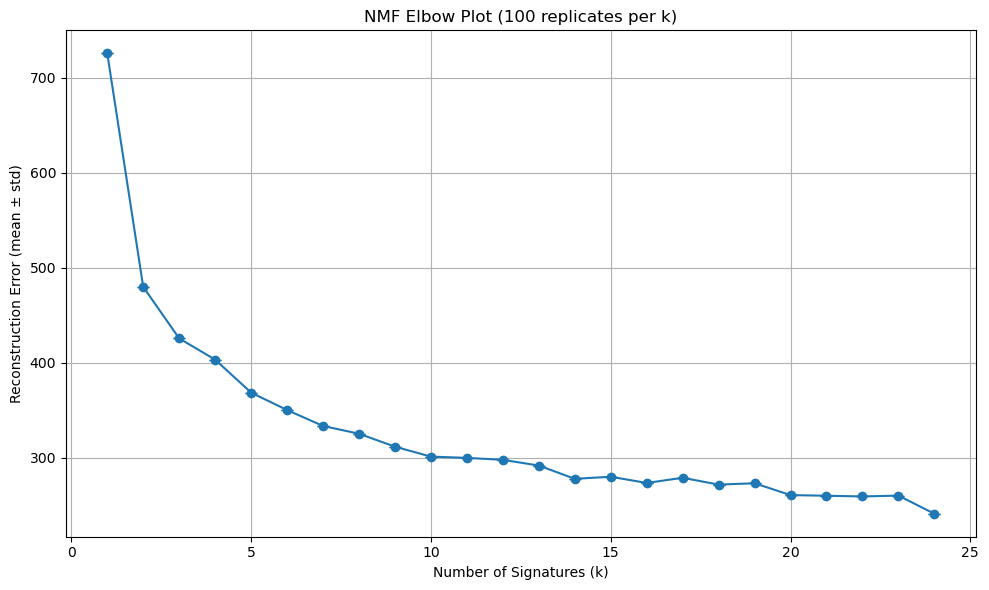

In [14]:
# Extract reconstruction error stats
ks = sorted(results.keys())
mean_errors = [results[k]['err_all'].mean() for k in ks]
std_errors = [results[k]['err_all'].std() for k in ks]

# Elbow plot
plt.figure(figsize=(10, 6))
plt.errorbar(ks, mean_errors, yerr=std_errors, fmt='-o', capsize=4)
plt.xlabel('Number of Signatures (k)')
plt.ylabel('Reconstruction Error (mean ± std)')
plt.title('NMF Elbow Plot (100 replicates per k)')
plt.grid(True)
plt.tight_layout()
plt.show()


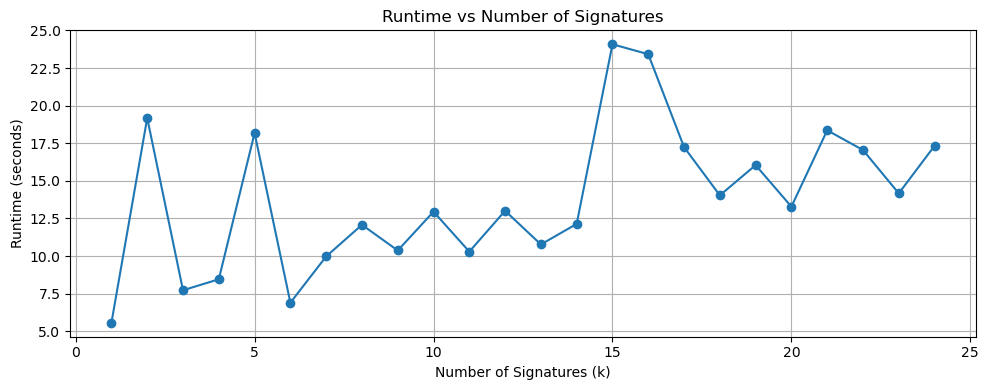

In [15]:
times = [results[k]['time'] for k in ks]

plt.figure(figsize=(10, 4))
plt.plot(ks, times, marker='o')
plt.xlabel('Number of Signatures (k)')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs Number of Signatures')
plt.grid(True)
plt.tight_layout()
plt.show()


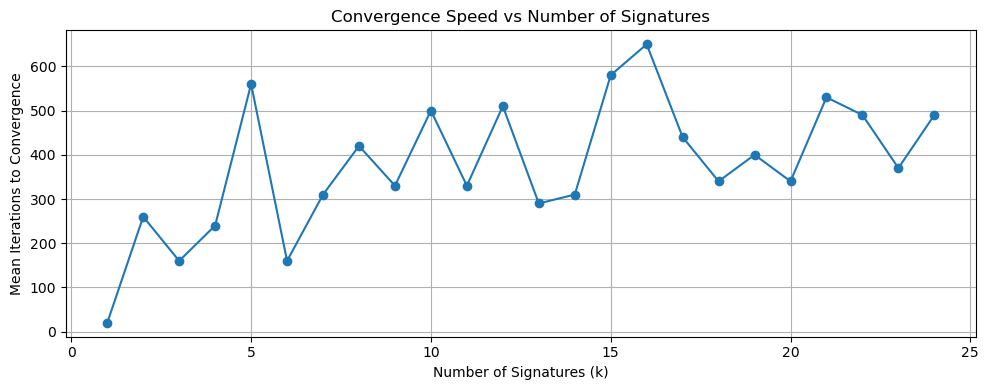

In [16]:
mean_iters = [results[k]['n_iter_all'].mean() for k in ks]

plt.figure(figsize=(10, 4))
plt.plot(ks, mean_iters, marker='o')
plt.xlabel('Number of Signatures (k)')
plt.ylabel('Mean Iterations to Convergence')
plt.title('Convergence Speed vs Number of Signatures')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:

ax2 = ax1.twinx()
ax2.plot(ks, stabilities, label="Stability", color="orange")
ax2.set_ylabel("Stability")

plt.title("NMF Component Selection")
plt.xlabel("Number of Components (k)")
plt.show()


NameError: name 'ax1' is not defined